# **Fraud Transaction Detection Process**

In this Colab notebook, we will perform fraud transaction detection using a credit card dataset. The goal is to build a machine learning model that can accurately detect fraudulent transactions while handling the class imbalance problem.

## Data Preparation

1. Import necessary libraries and load the credit card dataset.
2. Explore the dataset, including its shape and class distribution.

## Initial Model (Unbalanced Data)

3. Create an initial model using RandomForestClassifier on the unbalanced data.
4. Evaluate the model's performance and note the issues related to class imbalance.

## Random Under-sampling

5. Address the class imbalance using the Random Under-sampling technique.
6. Train a new model using RandomForestClassifier on the under-sampled data.
7. Evaluate the model's performance and compare it with the initial model.

## SMOTE (Synthetic Minority Over-sampling Technique)

8. Address the class imbalance using the SMOTE technique.
9. Train a new model using RandomForestClassifier on the SMOTE-generated data.
10. Evaluate the model's performance and compare it with the initial model and the Random Under-sampling model.

## XGBoost with Class Weights

11. Explore using XGBoost with class weights to handle class imbalance.
12. Train a model using XGBoost with adjusted class weights.
13. Evaluate the model's performance.

## Conclusion

14. Summarize the results and findings from the different techniques used.
15. Determine the most effective approach for fraud transaction detection.

Now, let's start by preparing the data and exploring it.



In [1]:
import pandas as pd
import seaborn as sns
from matplotlib import pyplot as plt
from sklearn.preprocessing import StandardScaler
from sklearn.impute import KNNImputer
import numpy as np
from sklearn.model_selection import train_test_split, cross_val_score
from sklearn.tree import DecisionTreeClassifier, plot_tree
from sklearn.metrics import accuracy_score, confusion_matrix, classification_report, RocCurveDisplay
from sklearn.ensemble import RandomForestClassifier
from imblearn.under_sampling import RandomUnderSampler
from imblearn.over_sampling import SMOTE
from xgboost import *
from sklearn.linear_model import LogisticRegression
df = pd.read_csv("/content/creditcard.csv")
df.head()

,Time,V1,V2,V3,V4,V5,V6,V7,V8,V9,...,V21,V22,V23,V24,V25,V26,V27,V28,Amount,Class
0,0,-1.359807,-0.072781,2.536347,1.378155,-0.338321,0.462388,0.239599,0.098698,0.363787,...,-0.018307,0.277838,-0.110474,0.066928,0.128539,-0.189115,0.133558,-0.021053,149.62,0.0
1,0,1.191857,0.266151,0.166480,0.448154,0.060018,-0.082361,-0.078803,0.085102,-0.255425,...,-0.225775,-0.638672,0.101288,-0.339846,0.167170,0.125895,-0.008983,0.014724,2.69,0.0
2,1,-1.358354,-1.340163,1.773209,0.379780,-0.503198,1.800499,0.791461,0.247676,-1.514654,...,0.247998,0.771679,0.909412,-0.689281,-0.327642,-0.139097,-0.055353,-0.059752,378.66,0.0
3,1,-0.966272,-0.185226,1.792993,-0.863291,-0.010309,1.247203,0.237609,0.377436,-1.387024,...,-0.108300,0.005274,-0.190321,-1.175575,0.647376,-0.221929,0.062723,0.061458,123.50,0.0
4,2,-1.158233,0.877737,1.548718,0.403034,-0.407193,0.095921,0.592941,-0.270533,0.817739,...,-0.009431,0.798278,-0.137458,0.141267,-0.206010,0.502292,0.219422,0.215153,69.99,0.0


In [2]:
df.shape

df["Class"].value_counts()

0.0    9926
1.0      38
Name: Class, dtype: int64

In [3]:
df1 = df.sample(frac=0.1)
y = df1["Class"]
X = df1.drop(["Class"], axis = 1)
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.2)
#Le cas initial
lr = RandomForestClassifier()
lr.fit(X_train, y_train)
y_hat = lr.predict(X_test)
accuracy_score(y_test, y_hat)

0.995

In [4]:
pd.crosstab(y_test, y_hat, rownames = ["actual"], colnames = ["predicted"])

predicted,0.0
actual,
0.0,199
1.0,1


In [5]:
print(classification_report(y_test, y_hat))

              precision    recall  f1-score   support

         0.0       0.99      1.00      1.00       199
         1.0       0.00      0.00      0.00         1

    accuracy                           0.99       200
   macro avg       0.50      0.50      0.50       200
weighted avg       0.99      0.99      0.99       200



/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


In [8]:
y_train.value_counts() #C'est desequilibre!


0.0    7938
1.0      33
Name: Class, dtype: int64

In [11]:
#RandomUnderSampler
y = df["Class"]
X = df.drop(["Class"], axis = 1)
sampler = RandomUnderSampler()
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.2)
X_train1,y_train1 = sampler.fit_resample(X_train,y_train)

In [12]:
y_train1.value_counts()

0.0    31
1.0    31
Name: Class, dtype: int64

In [13]:
y_test.value_counts()

0.0    1985
1.0       7
Name: Class, dtype: int64

In [21]:
from sklearn.impute import SimpleImputer

# Instantiate the imputer
imputer = SimpleImputer(strategy='mean')

# Fit and transform the imputer on your training data
X_train1 = imputer.fit_transform(X_train1)

# Transform the test data using the same imputer
X_test = imputer.transform(X_test)


In [22]:
df.dropna(inplace=True)


In [23]:
#RandomUnderSampler
y = df["Class"]
X = df.drop(["Class"], axis = 1)
sampler = RandomUnderSampler()
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.2)
X_train1,y_train1 = sampler.fit_resample(X_train,y_train)
model = RandomForestClassifier()
model.fit(X_train1, y_train1)
y_hat = model.predict(X_test)
accuracy_score(y_test, y_hat)

0.9884596086302058

In [24]:
pd.crosstab(y_test, y_hat, rownames = ["actual"], colnames = ["predicted"])

predicted,0.0,1.0
actual,,
0.0,1962,23
1.0,0,8


In [25]:
print(classification_report(y_test, y_hat))

              precision    recall  f1-score   support

         0.0       1.00      0.99      0.99      1985
         1.0       0.26      1.00      0.41         8

    accuracy                           0.99      1993
   macro avg       0.63      0.99      0.70      1993
weighted avg       1.00      0.99      0.99      1993



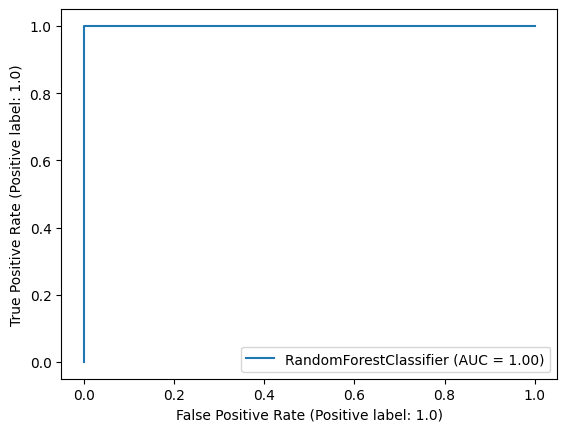

In [26]:
RocCurveDisplay.from_estimator(model, X_test, y_test)

In [35]:
sampler = SMOTE(sampling_strategy='auto', random_state=42)  # Change the random_state value


In [ ]:
#SMOTE
sampler = SMOTE()
y = df1["Class"]
X = df1.drop(["Class"], axis = 1)
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.2)
X_train1,y_train1 = sampler.fit_resample(X_train,y_train)

In [38]:
y_train1.value_counts()

0.0    1
1.0    1
Name: Class, dtype: int64

In [39]:
y_test.value_counts()

0.0    200
Name: Class, dtype: int64

In [40]:
model = RandomForestClassifier()
model.fit(X_train1, y_train1)
y_hat = model.predict(X_test)
accuracy_score(y_test, y_hat)

0.98

In [41]:
pd.crosstab(y_test, y_hat, rownames = ["actual"], colnames = ["predicted"])

predicted,0.0,1.0
actual,,
0.0,196,4


In [42]:
print(classification_report(y_test, y_hat))

              precision    recall  f1-score   support

         0.0       1.00      0.98      0.99       200
         1.0       0.00      0.00      0.00         0

    accuracy                           0.98       200
   macro avg       0.50      0.49      0.49       200
weighted avg       1.00      0.98      0.99       200



/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Recall and F-score are ill-defined and being set to 0.0 in labels with no true samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Recall and F-score are ill-defined and being set to 0.0 in labels with no true samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Recall and F-score are ill-defined and being set to 0.0 in labels with no true samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


In [44]:
#XGBoost pondere
y = df1["Class"]
X = df1.drop(["Class"], axis = 1)
y.value_counts()

0.0    995
1.0      1
Name: Class, dtype: int64

In [45]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.2)

In [46]:
model = XGBClassifier(scale_pos_weight = 28426/55)
model.fit(X_train, y_train)
y_hat1 = model.predict(X_test)
accuracy_score(y_test, y_hat)

0.975

In [47]:
pd.crosstab(y_test, y_hat, rownames = ["actual"], colnames = ["predicted"])

predicted,0.0,1.0
actual,,
0.0,195,4
1.0,1,0


In [48]:
print(classification_report(y_test, y_hat))

              precision    recall  f1-score   support

         0.0       0.99      0.98      0.99       199
         1.0       0.00      0.00      0.00         1

    accuracy                           0.97       200
   macro avg       0.50      0.49      0.49       200
weighted avg       0.99      0.97      0.98       200

